In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

image.png

In [83]:
df = pd.read_csv('/content/MBP.csv')
df.head()

Phone Name  Rating ?/5 Number of Ratings       RAM  \
0   POCO C50 (Royal Blue, 32 GB)         4.2            33,561  2 GB RAM   
1  POCO M4 5G (Cool Blue, 64 GB)         4.2            77,128  4 GB RAM   
2   POCO C51 (Royal Blue, 64 GB)         4.3            15,175  4 GB RAM   
3    POCO C55 (Cool Blue, 64 GB)         4.2            22,621  4 GB RAM   
4  POCO C51 (Power Black, 64 GB)         4.3            15,175  4 GB RAM   

  ROM/Storage       Back/Rare Camera      Front Camera   Battery  \
0   32 GB ROM        8MP Dual Camera  5MP Front Camera  5000 mAh   
1   64 GB ROM             50MP + 2MP  8MP Front Camera  5000 mAh   
2   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3   64 GB ROM  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                                           Processor Price in INR  \
0  Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...       ₹5,649   
1                   Mediatek Dimensity 700 Processor      ₹11,999   
2                                Helio G36 Processor       ₹6,999   
3                       Mediatek Helio G85 Processor       ₹7,749   
4                                Helio G36 Processor       ₹6,999   

  Date of Scraping  
0       2023-06-17  
1       2023-06-17  
2       2023-06-17  
3       2023-06-17  
4       2023-06-17

In [84]:
# ₹

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [86]:
df.columns

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

In [87]:
def move_ROM_from_RAM(row):
    if row['RAM'] is not None and row['RAM'].endswith("ROM"):
        row['ROM/Storage'] = row['RAM']
        row['RAM'] = None
    return row

df = df.apply(move_ROM_from_RAM, axis=1)
print(df.columns)

df['RAM'] = df['RAM'].fillna('None').apply(lambda x: x.replace('RAM', ''))

mb_to_gb = {
    "MB": 0.001,
    "GB": 1
}

def convert_ram_to_gb(ram_value):
    value, unit = ram_value.split()
    return float(value) * mb_to_gb[unit]

def check_ram_value(value):
    valid_values = ['MB', 'GB']
    for valid_value in valid_values:
        if valid_value in value:
            return value
    return None

df['RAM'] = df['RAM'].apply(check_ram_value)

unwanted_strings = ['Expandable Upto 16 GB', 'Expandable Upto 2 GB']
df['RAM'] = df['RAM'].apply(lambda x: None if x in unwanted_strings else x)
df.dropna(subset=['RAM'], inplace=True)

df['RAM GB'] = df['RAM'].apply(convert_ram_to_gb)
df.drop(columns=['RAM'], inplace=True)

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')


In [88]:
df['ROM/Storage'] = df['ROM/Storage'].str.replace('ROM', '').str.replace('GB', '')

In [89]:
df.head()

Phone Name  Rating ?/5 Number of Ratings ROM/Storage  \
0   POCO C50 (Royal Blue, 32 GB)         4.2            33,561        32     
1  POCO M4 5G (Cool Blue, 64 GB)         4.2            77,128        64     
2   POCO C51 (Royal Blue, 64 GB)         4.3            15,175        64     
3    POCO C55 (Cool Blue, 64 GB)         4.2            22,621        64     
4  POCO C51 (Power Black, 64 GB)         4.3            15,175        64     

        Back/Rare Camera      Front Camera   Battery  \
0        8MP Dual Camera  5MP Front Camera  5000 mAh   
1             50MP + 2MP  8MP Front Camera  5000 mAh   
2   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                                           Processor Price in INR  \
0  Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...       ₹5,649   
1                   Mediatek Dimensity 700 Processor      ₹11,999   
2                                Helio G36 Processor       ₹6,999   
3                       Mediatek Helio G85 Processor       ₹7,749   
4                                Helio G36 Processor       ₹6,999   

  Date of Scraping  RAM GB  
0       2023-06-17     2.0  
1       2023-06-17     4.0  
2       2023-06-17     4.0  
3       2023-06-17     4.0  
4       2023-06-17     4.0

In [90]:
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

In [91]:
df['BRAND'] = df['Phone Name'].str.split().str[0]
df['BRAND'].value_counts()

BRAND
realme      233
SAMSUNG     220
vivo        216
Nokia       130
POCO        120
OnePlus     120
Infinix     120
OPPO        120
Redmi       104
MOTOROLA     78
Mi           45
Xiaomi       28
Lenovo       24
Google       17
Alcatel      16
REDMI        12
Huawei       11
Moto          8
Realme        7
Nothing       5
Nexus         3
Motorola      3
A10E          2
�9A           2
a             1
10A           1
Name: count, dtype: int64

In [92]:
df = df.drop(df[(df['BRAND'] == 'A10E') | (df['BRAND'] == 'a')| (df['BRAND'] == '�9A')| (df['BRAND'] == '10A')].index)
df['BRAND'].value_counts()

BRAND
realme      233
SAMSUNG     220
vivo        216
Nokia       130
POCO        120
OnePlus     120
Infinix     120
OPPO        120
Redmi       104
MOTOROLA     78
Mi           45
Xiaomi       28
Lenovo       24
Google       17
Alcatel      16
REDMI        12
Huawei       11
Moto          8
Realme        7
Nothing       5
Motorola      3
Nexus         3
Name: count, dtype: int64

In [93]:
df['Price in INR'] = df['Price in INR'].str.replace('₹', '')
df['Price in INR'] = df['Price in INR'].str.replace(',', '').astype(float)

In [94]:
df['Rating ?/5'] = df['Rating ?/5'].astype(float)

In [95]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',', '').astype(float)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1640 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1640 non-null   object 
 1   Rating ?/5         1640 non-null   float64
 2   Number of Ratings  1640 non-null   float64
 3   ROM/Storage        1640 non-null   object 
 4   Back/Rare Camera   1640 non-null   object 
 5   Front Camera       1290 non-null   object 
 6   Battery            1640 non-null   object 
 7   Processor          1616 non-null   object 
 8   Price in INR       1640 non-null   float64
 9   Date of Scraping   1640 non-null   object 
 10  RAM GB             1640 non-null   float64
 11  BRAND              1640 non-null   object 
dtypes: float64(4), object(8)
memory usage: 166.6+ KB


In [98]:
# values_to_keep = ['128 GB ROM', '64 GB ROM','32 GB ROM', '256 GB ROM', '16 GB ROM' ]
# df['ROM'] = df['ROM/Storage'].apply(lambda x: x if x in values_to_keep else 'others')

In [99]:
df.head()

Phone Name  Rating ?/5  Number of Ratings ROM/Storage  \
0   POCO C50 (Royal Blue, 32 GB)         4.2            33561.0        32     
1  POCO M4 5G (Cool Blue, 64 GB)         4.2            77128.0        64     
2   POCO C51 (Royal Blue, 64 GB)         4.3            15175.0        64     
3    POCO C55 (Cool Blue, 64 GB)         4.2            22621.0        64     
4  POCO C51 (Power Black, 64 GB)         4.3            15175.0        64     

        Back/Rare Camera      Front Camera   Battery  \
0        8MP Dual Camera  5MP Front Camera  5000 mAh   
1             50MP + 2MP  8MP Front Camera  5000 mAh   
2   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                                           Processor  Price in INR  \
0  Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...        5649.0   
1                   Mediatek Dimensity 700 Processor       11999.0   
2                                Helio G36 Processor        6999.0   
3                       Mediatek Helio G85 Processor        7749.0   
4                                Helio G36 Processor        6999.0   

  Date of Scraping  RAM GB BRAND  
0       2023-06-17     2.0  POCO  
1       2023-06-17     4.0  POCO  
2       2023-06-17     4.0  POCO  
3       2023-06-17     4.0  POCO  
4       2023-06-17     4.0  POCO

In [100]:
# df['ROM'].value_counts()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1640 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1640 non-null   object 
 1   Rating ?/5         1640 non-null   float64
 2   Number of Ratings  1640 non-null   float64
 3   ROM/Storage        1640 non-null   object 
 4   Back/Rare Camera   1640 non-null   object 
 5   Front Camera       1290 non-null   object 
 6   Battery            1640 non-null   object 
 7   Processor          1616 non-null   object 
 8   Price in INR       1640 non-null   float64
 9   Date of Scraping   1640 non-null   object 
 10  RAM GB             1640 non-null   float64
 11  BRAND              1640 non-null   object 
dtypes: float64(4), object(8)
memory usage: 231.1+ KB


In [103]:
df['Battery'] = df['Battery'].fillna('None').apply(lambda x: x.replace('mAh', ''))

df['Battery'] = pd.to_numeric(df['Battery'], errors='coerce')
df = df.dropna(subset=['Battery'])

In [104]:
df = df.drop("Date of Scraping", axis=1)

In [105]:
df['Processor'] = df['Processor'].str.replace(r'\s*Processor.*', '', regex=True)

In [106]:
df['ProcessorCek'] = df['Processor'].apply(
    lambda x: 'Mediatek' if isinstance(x, str) and 'mediatek' in x.lower() else
              'Qualcomm' if isinstance(x, str) and 'qualcomm' in x.lower() else
              'Others'
)

df['ProcessorCek'].value_counts()

ProcessorCek
Others      661
Mediatek    503
Qualcomm    465
Name: count, dtype: int64

In [107]:
df = df.drop("Processor", axis=1)

In [108]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
ROM/Storage            0
Back/Rare Camera       0
Front Camera         339
Battery                0
Price in INR           0
RAM GB                 0
BRAND                  0
ProcessorCek           0
dtype: int64

In [109]:
df['Back/Rare Camera'].unique()

array(['8MP Dual Camera', '50MP + 2MP', '8MP Dual Rear Camera',
       '50MP Dual Rear Camera',
       '50MP + 2MP Depth Sensor + 2MP Macro Sensor', '64MP + 8MP + 2MP',
       '48MP + 8MP + 2MP', '50MP + 8MP', '108MP + 8MP + 2MP',
       '48MP + 2MP + 2MP', '64MP (OIS) + 8MP + 2MP', '13MP + 2MP + 2MP',
       '64MP + 8MP + 2MP + 2MP', '12MP + 5MP', '13MP + 8MP + 5MP + 2MP',
       '48MP + 8MP + 5MP + 2MP', '48MP + 8MP + 2MP + 2MP',
       '64MP + 13MP + 2MP + 2MP', '64MP + 2MP', '50MP + 0.3MP',
       '8MP Rear Camera', '108MP + 2MP', '50MP + 2MP + 2MP',
       '64MP Rear Camera', '50MP + 2MP + 0.3MP', '50MP + 8MP + 2MP',
       '13MP + 2MP + 0.3MP', '50MP Rear Camera', '64MP + 8MP + 8MP + 2MP',
       '48MP Rear Camera', '64MP + 12MP + 8MP + 2MP', '13MP + 2MP',
       '50MP + 5MP + 2MP', '0MP', '50MP + 12MP + 10MP',
       '108MP Rear Camera', '12MP Rear Camera', '50MP + 5MP',
       '12MP + 12MP', '48MP + 8MP + 5MP', '50MP + 12MP + 5MP',
       '12MP + 12MP + 8MP (OIS)', '12MP + 12MP

In [110]:
df["Front Camera"] = df["Front Camera"].str[:2]
df["Back/Rare Camera"] = df["Back/Rare Camera"].str[:2]

In [111]:
df["Front Camera"] = df["Front Camera"].str.replace('\D', '', regex=True)
df["Back/Rare Camera"] = df["Back/Rare Camera"].str.replace('\D', '', regex=True)

In [112]:
df = df.rename(columns={"Front Camera":"Front Camera MP","Back/Rare Camera":"Back/Rare Camera MP" })

In [113]:
df.isnull().sum()

Phone Name               0
Rating ?/5               0
Number of Ratings        0
ROM/Storage              0
Back/Rare Camera MP      0
Front Camera MP        339
Battery                  0
Price in INR             0
RAM GB                   0
BRAND                    0
ProcessorCek             0
dtype: int64

In [114]:
df

Phone Name  Rating ?/5  Number of Ratings  \
0                 POCO C50 (Royal Blue, 32 GB)         4.2            33561.0   
1                POCO M4 5G (Cool Blue, 64 GB)         4.2            77128.0   
2                 POCO C51 (Royal Blue, 64 GB)         4.3            15175.0   
3                  POCO C55 (Cool Blue, 64 GB)         4.2            22621.0   
4                POCO C51 (Power Black, 64 GB)         4.3            15175.0   
...                                        ...         ...                ...   
1831      Infinix Note 7 (Forest Green, 64 GB)         4.3            25582.0   
1832      Infinix Note 7 (Bolivia Blue, 64 GB)         4.3            25582.0   
1833      Infinix Note 7 (Aether Black, 64 GB)         4.3            25582.0   
1834  Infinix Zero 8i (Silver Diamond, 128 GB)         4.2             7117.0   
1835          Infinix S5 (Quetzal Cyan, 64 GB)         4.3            15701.0   

     ROM/Storage Back/Rare Camera MP Front Camera MP  Battery  Price in INR  \
0           32                     8               5   5000.0        5649.0   
1           64                    50               8   5000.0       11999.0   
2           64                     8               5   5000.0        6999.0   
3           64                    50               5   5000.0        7749.0   
4           64                     8               5   5000.0        6999.0   
...          ...                 ...             ...      ...           ...   
1831        64                    48              16   5000.0       14999.0   
1832        64                    48              16   5000.0       14999.0   
1833        64                    48              16   5000.0       14999.0   
1834       128                    48              16   4500.0       18999.0   
1835        64                    16              32   4000.0       10999.0   

      RAM GB    BRAND ProcessorCek  
0        2.0     POCO     Mediatek  
1        4.0     POCO     Mediatek  
2        4.0     POCO       Others  
3        4.0     POCO     Mediatek  
4        4.0     POCO       Others  
...      ...      ...          ...  
1831     4.0  Infinix     Mediatek  
1832     4.0  Infinix     Mediatek  
1833     4.0  Infinix     Mediatek  
1834     8.0  Infinix     Mediatek  
1835     4.0  Infinix       Others  

[1629 rows x 11 columns]

In [115]:
del df['Phone Name']

In [116]:
df

Rating ?/5  Number of Ratings ROM/Storage Back/Rare Camera MP  \
0            4.2            33561.0        32                     8   
1            4.2            77128.0        64                    50   
2            4.3            15175.0        64                     8   
3            4.2            22621.0        64                    50   
4            4.3            15175.0        64                     8   
...          ...                ...         ...                 ...   
1831         4.3            25582.0        64                    48   
1832         4.3            25582.0        64                    48   
1833         4.3            25582.0        64                    48   
1834         4.2             7117.0       128                    48   
1835         4.3            15701.0        64                    16   

     Front Camera MP  Battery  Price in INR  RAM GB    BRAND ProcessorCek  
0                  5   5000.0        5649.0     2.0     POCO     Mediatek  
1                  8   5000.0       11999.0     4.0     POCO     Mediatek  
2                  5   5000.0        6999.0     4.0     POCO       Others  
3                  5   5000.0        7749.0     4.0     POCO     Mediatek  
4                  5   5000.0        6999.0     4.0     POCO       Others  
...              ...      ...           ...     ...      ...          ...  
1831              16   5000.0       14999.0     4.0  Infinix     Mediatek  
1832              16   5000.0       14999.0     4.0  Infinix     Mediatek  
1833              16   5000.0       14999.0     4.0  Infinix     Mediatek  
1834              16   4500.0       18999.0     8.0  Infinix     Mediatek  
1835              32   4000.0       10999.0     4.0  Infinix       Others  

[1629 rows x 10 columns]

In [117]:
sns.set(rc={'figure.figsize':(12,8)})
plt.figure()
sns.distplot(df['Front Camera MP'], bins=20)
plt.title(f'Distribusi {col}')
plt.xlabel(col)
plt.ylabel('Frekuensi')

# Tampilkan semua plot
plt.show()

<ipython-input-117-416723326fa8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Front Camera MP'], bins=20)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating ?/5           1629 non-null   float64
 1   Number of Ratings    1629 non-null   float64
 2   ROM/Storage          1629 non-null   object 
 3   Back/Rare Camera MP  1629 non-null   object 
 4   Front Camera MP      1290 non-null   object 
 5   Battery              1629 non-null   float64
 6   Price in INR         1629 non-null   float64
 7   RAM GB               1629 non-null   float64
 8   BRAND                1629 non-null   object 
 9   ProcessorCek         1629 non-null   object 
dtypes: float64(5), object(5)
memory usage: 140.0+ KB


In [119]:
df['Front Camera MP'] = pd.to_numeric(df['Front Camera MP'], errors='coerce')
df['Back/Rare Camera MP'] = pd.to_numeric(df['Back/Rare Camera MP'], errors='coerce')

In [120]:
df['Front Camera MP'].fillna(df['Front Camera MP'].mean(), inplace=True)

In [122]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns=cat_col)
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629 entries, 0 to 1835
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating ?/5             1629 non-null   float64
 1   Number of Ratings      1629 non-null   float64
 2   Back/Rare Camera MP    1629 non-null   int64  
 3   Front Camera MP        1629 non-null   float64
 4   Battery                1629 non-null   float64
 5   Price in INR           1629 non-null   float64
 6   RAM GB                 1629 non-null   float64
 7   ROM/Storage_0          1629 non-null   int64  
 8   ROM/Storage_0.125      1629 non-null   int64  
 9   ROM/Storage_10 MB      1629 non-null   int64  
 10  ROM/Storage_100 MB     1629 non-null   int64  
 11  ROM/Storage_128        1629 non-null   int64  
 12  ROM/Storage_128 MB     1629 non-null   int64  
 13  ROM/Storage_153 MB     1629 non-null   int64  
 14  ROM/Storage_16         1629 non-null   int64  
 15  ROM/Stora

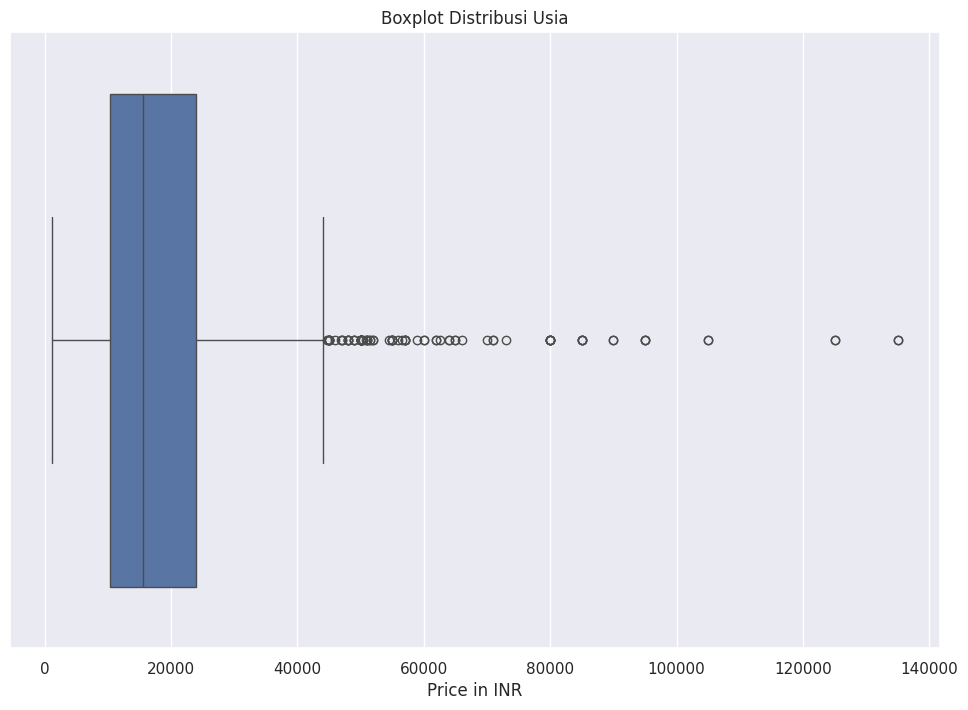

In [123]:
sns.boxplot(x='Price in INR', data=df)
plt.title('Boxplot Distribusi Usia')
plt.show()

In [126]:
Q1 = df['Price in INR'].quantile(0.25)
Q3 = df['Price in INR'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Price in INR'] = df['Price in INR'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [127]:
sns.boxplot(x='Price in INR', data=df)
plt.title('Boxplot Distribusi Usia')
plt.show()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1629 entries, 0 to 1835
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating ?/5             1629 non-null   float64
 1   Number of Ratings      1629 non-null   float64
 2   Back/Rare Camera MP    1629 non-null   int64  
 3   Front Camera MP        1629 non-null   float64
 4   Battery                1629 non-null   float64
 5   Price in INR           1629 non-null   float64
 6   RAM GB                 1629 non-null   float64
 7   ROM/Storage_0          1629 non-null   int64  
 8   ROM/Storage_0.125      1629 non-null   int64  
 9   ROM/Storage_10 MB      1629 non-null   int64  
 10  ROM/Storage_100 MB     1629 non-null   int64  
 11  ROM/Storage_128        1629 non-null   int64  
 12  ROM/Storage_128 MB     1629 non-null   int64  
 13  ROM/Storage_153 MB     1629 non-null   int64  
 14  ROM/Storage_16         1629 non-null   int64  
 15  ROM/Stora

In [130]:
df.duplicated().sum()

578

In [131]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [132]:
df.to_csv('MBP_Clean.csv', index=False)



---

